In [39]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
df = pd.read_csv('/content/sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
# Display basic info and first 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
# Identify numerical and categorical columns
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
categorical_cols = ['Day', 'City', 'BU', 'Brand', 'Model']


In [ ]:
# Computing descriptive statistics
stats_df = pd.DataFrame({
    "Mean": df[numerical_cols].mean(),
    "Median": df[numerical_cols].median(),
    "Mode": df[numerical_cols].mode().iloc[0],
    "Standard Deviation": df[numerical_cols].std()
})
print("Descriptive Statistics:")
stats_df

Descriptive Statistics:


,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [ ]:
# Apply standardization(Z-score normalization) using the formula
for col in numerical_cols:
    mu = df[col].mean()  # Calculate mean
    sigma = df[col].std() # Calculate standard deviation
    df[col + '_standardized'] = (df[col] - mu) / sigma
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume_standardized,Avg Price_standardized,Total Sales Value_standardized,Discount Rate (%)_standardized,Discount Amount_standardized,Net Sales Value_standardized
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


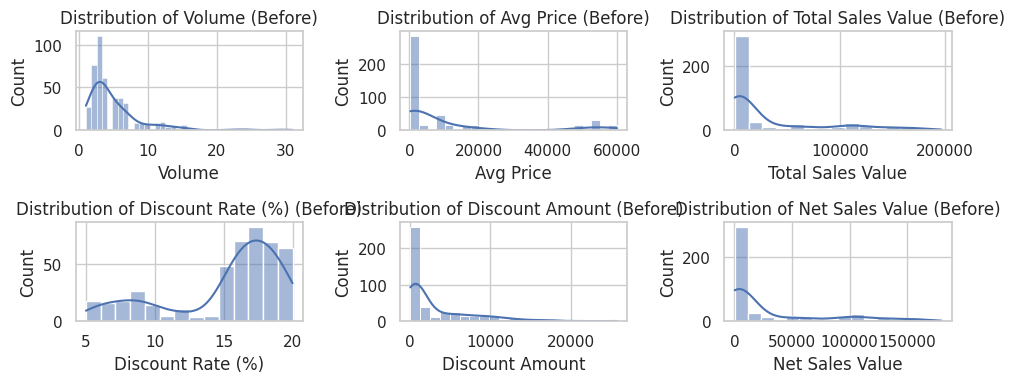

/n


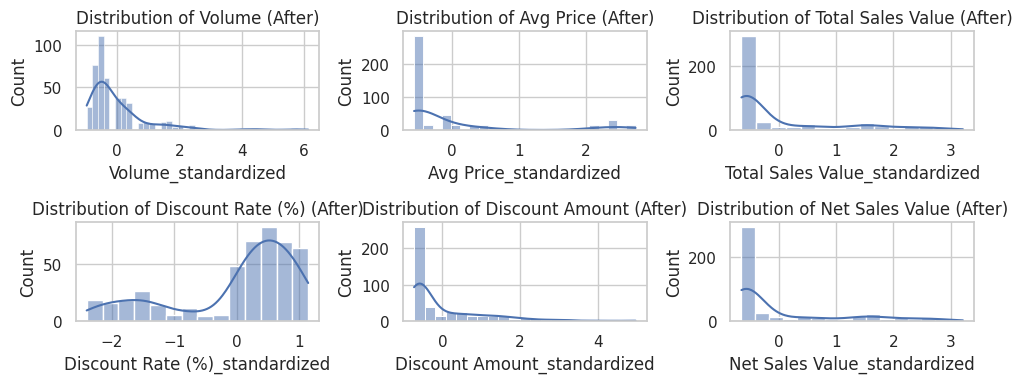

In [ ]:
# Before standardization
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Before)')
plt.tight_layout()
plt.show()

print('/n')

# After standardization
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col + '_standardized'], kde=True)
    plt.title(f'Distribution of {col} (After)')
plt.tight_layout()
plt.show()


In [ ]:
# Set plot style
sns.set(style="whitegrid")


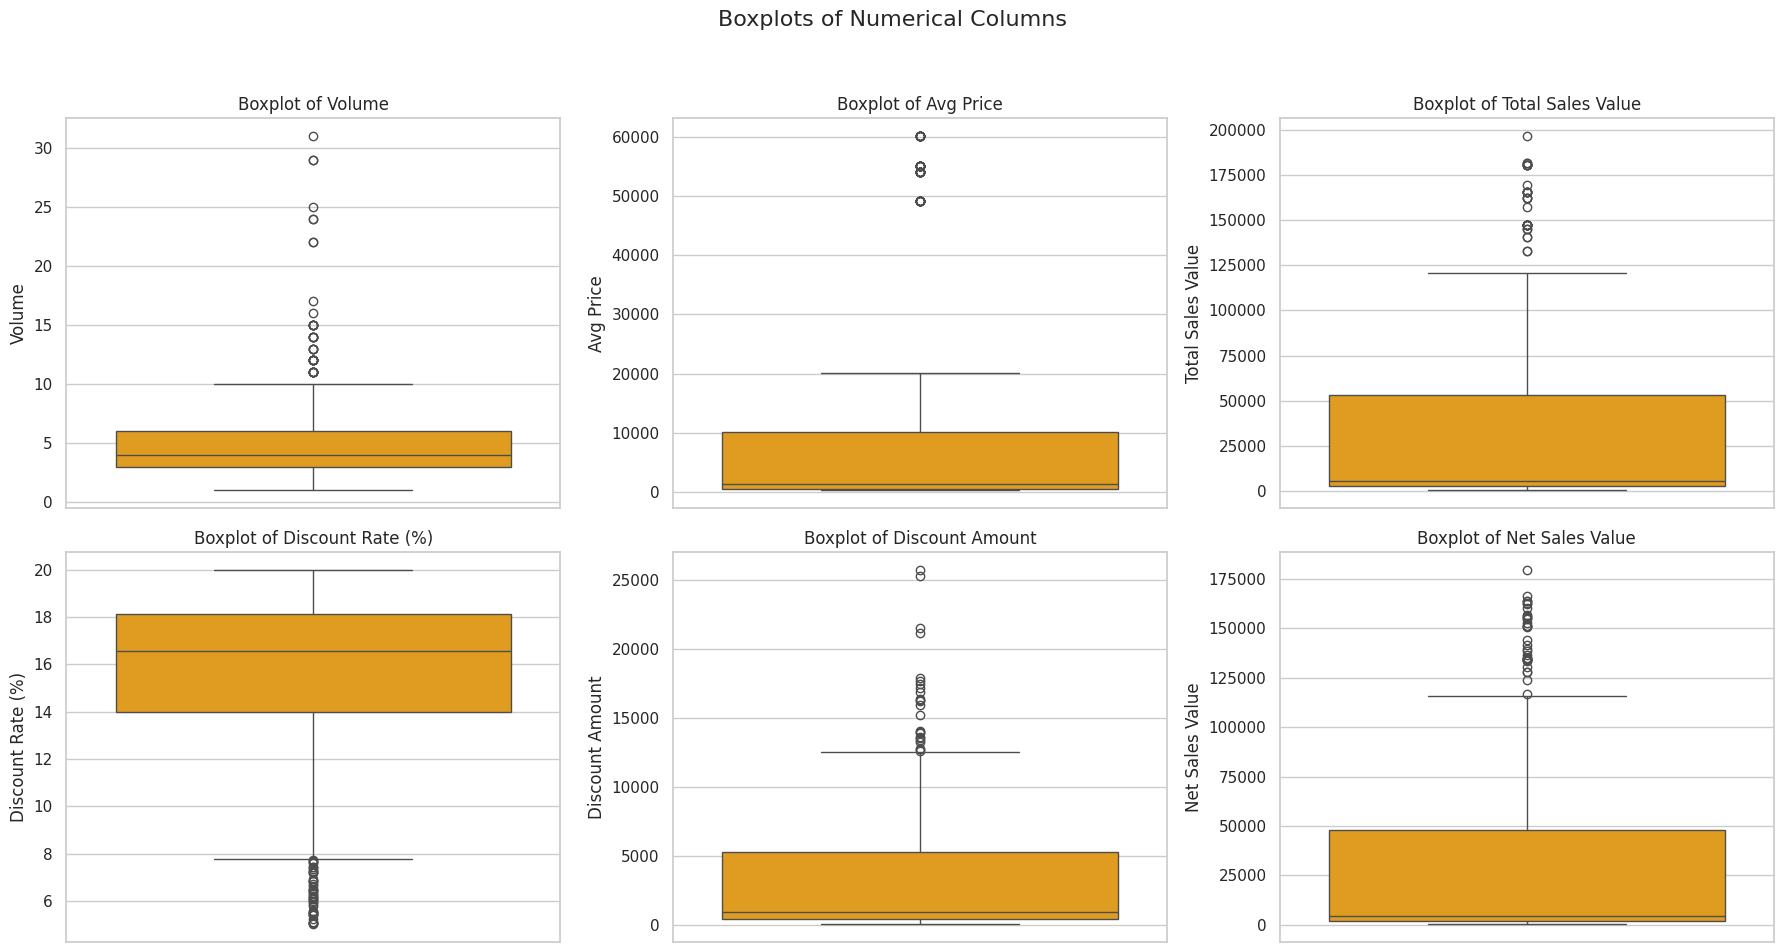

In [ ]:
# Boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Numerical Columns", fontsize=16)
for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(y=df[col], ax=ax, color="orange")
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

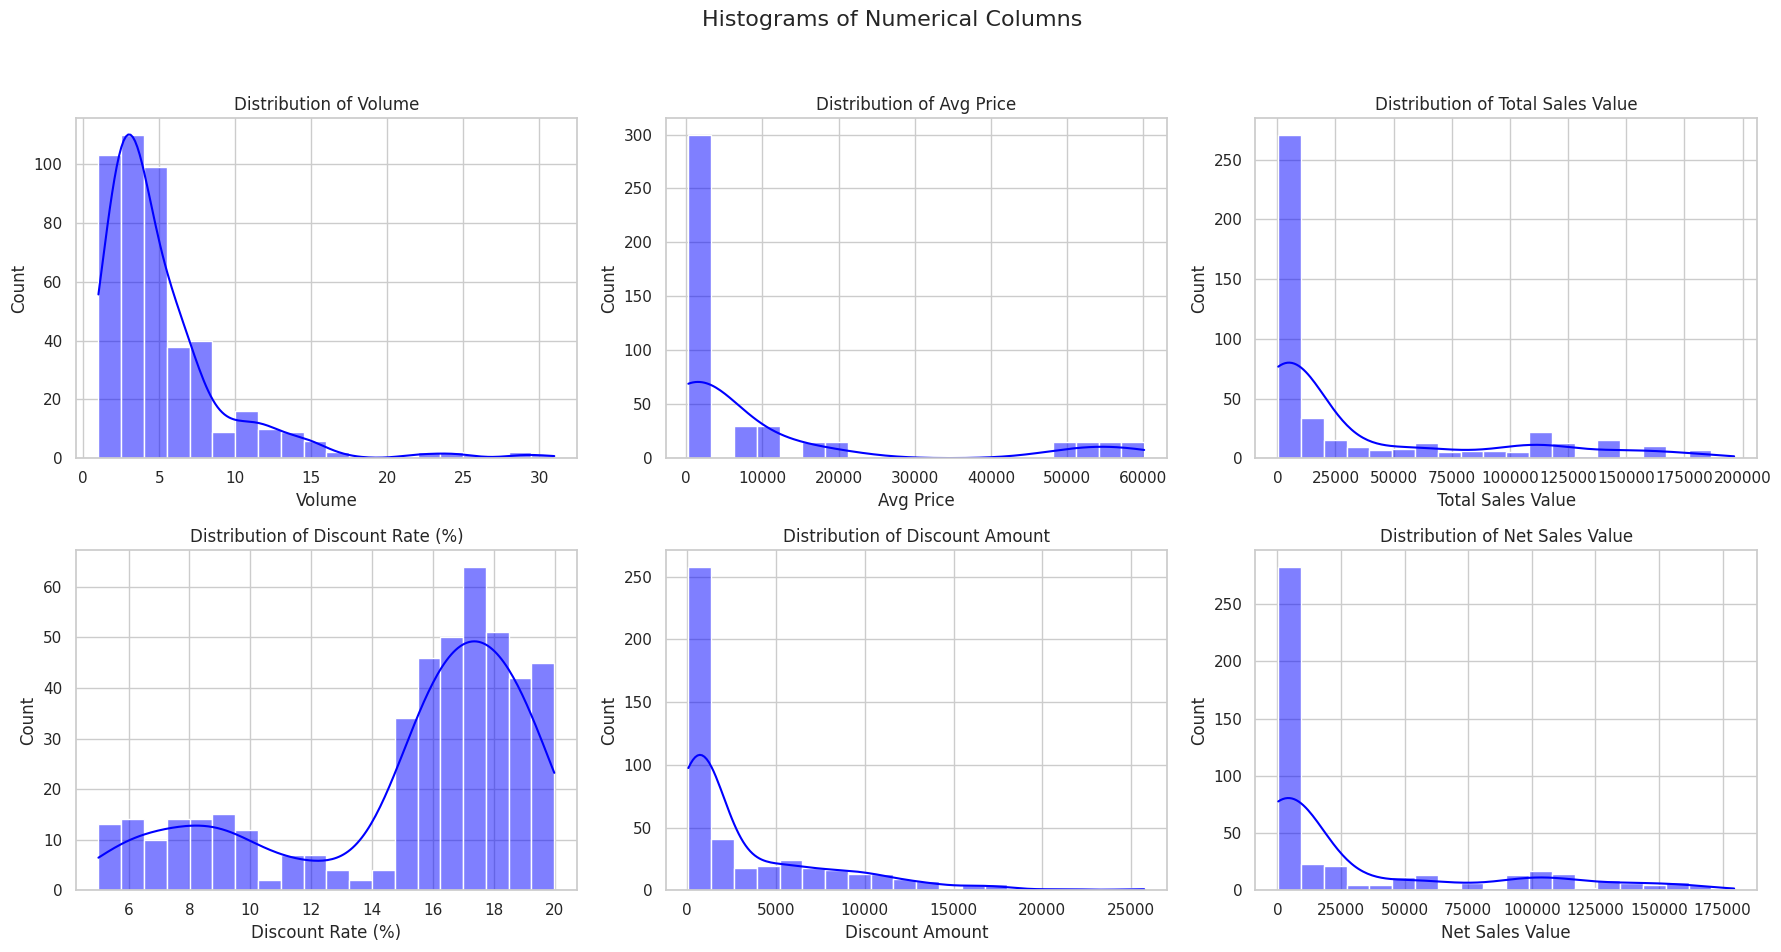

In [ ]:
# Histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Histograms of Numerical Columns", fontsize=16)
for ax, col in zip(axes.flatten(), numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax, color="blue")
    ax.set_title(f"Distribution of {col}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

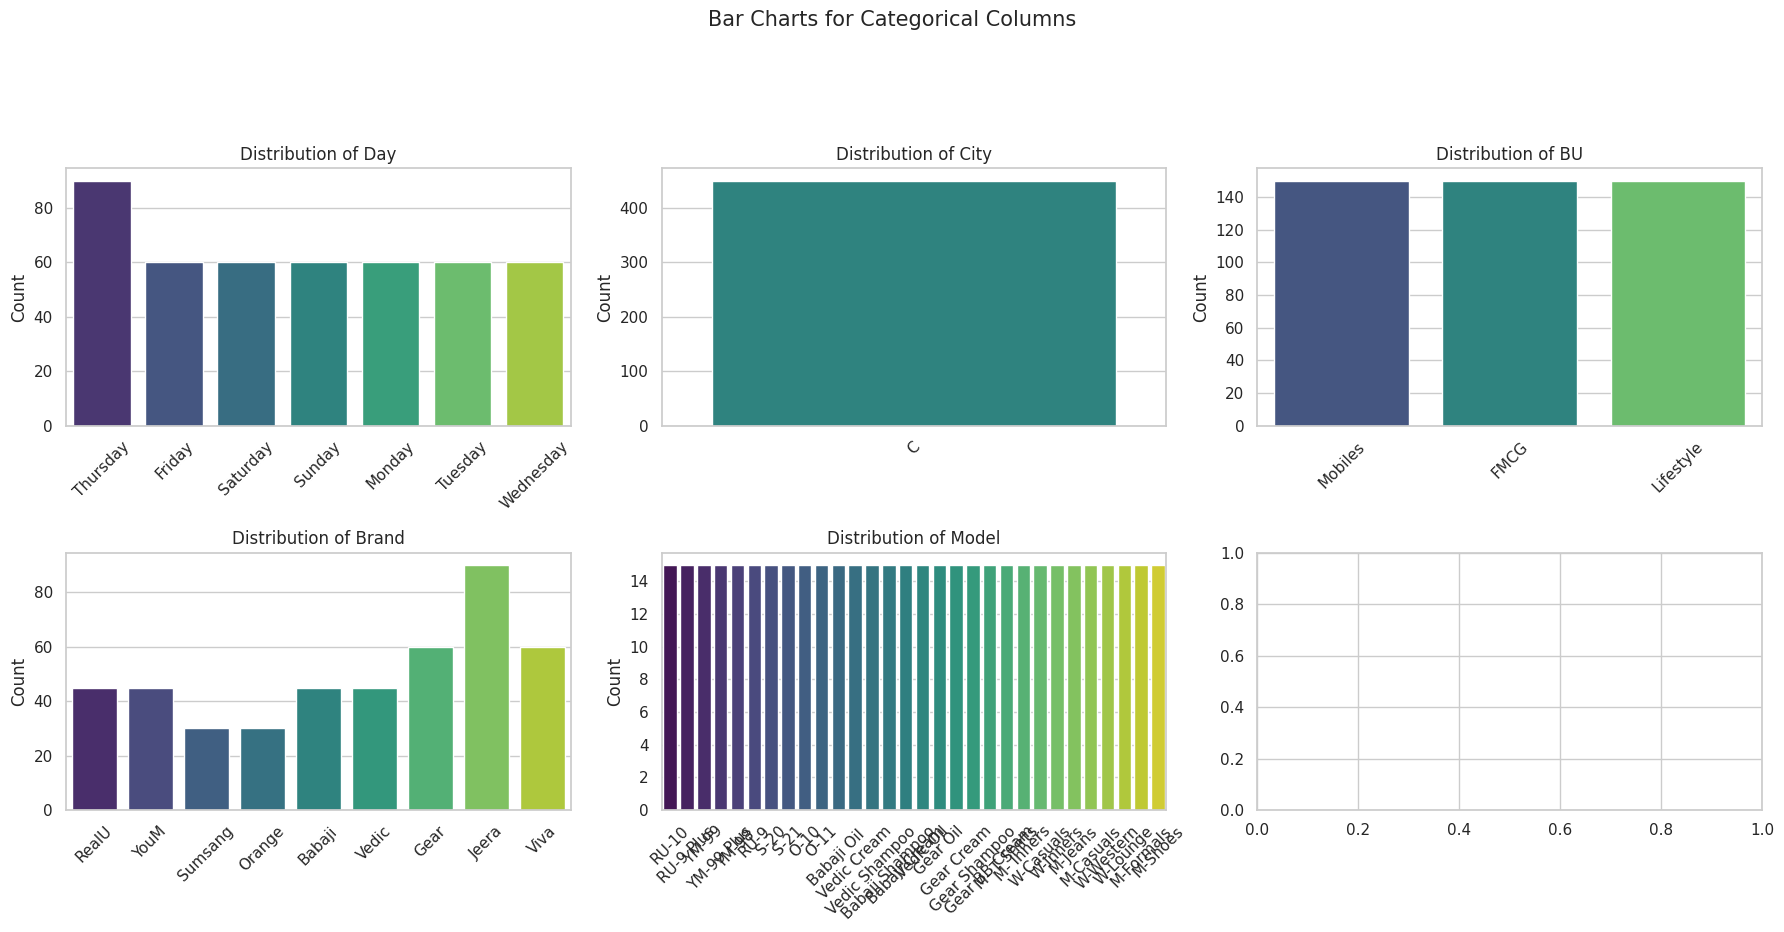

In [ ]:
# Bar charts for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Bar Charts for Categorical Columns", fontsize=15)
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(x=df[col], ax=ax, palette="viridis")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.show()


In [ ]:
# Standardization of numerical using scaling method variables
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Standardized Data Sample:")
df_standardized.head()

Standardized Data Sample:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume_standardized,Avg Price_standardized,Total Sales Value_standardized,Discount Rate (%)_standardized,Discount Amount_standardized,Net Sales Value_standardized
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [ ]:
# One-hot encoding of categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols,dtype='int', drop_first=True)
print("Encoded Data Sample:")
df_encoded.head()

#By converting categorical data into dummy variables, one-hot encoding ensures that machine learning models can effectively interpret and learn from categorical features, leading to more accurate and reliable predictions.

Encoded Data Sample:


,Date,SKU,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume_standardized,Avg Price_standardized,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,M01,15,12100,181500,11.654820,21153.498820,160346.501180,2.347417,0.091072,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,M02,10,10100,101000,11.560498,11676.102961,89323.897039,1.165831,-0.019548,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,M03,7,16100,112700,9.456886,10657.910157,102042.089843,0.456880,0.312312,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,M04,6,20100,120600,6.935385,8364.074702,112235.925298,0.220563,0.533552,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,M05,3,8100,24300,17.995663,4372.946230,19927.053770,-0.488389,-0.130168,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Displaying the portion of transformed dataset

print("standardized  Data Sample are:")
print(df_standardized.head())
print("Encoded Data Sample are:")
print(df_encoded.head())

standardized  Data Sample are:
         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  2.350029  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  1.167129  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.457388  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.220808  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C -0.488932  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.091173           2.925721          -0.830289         3.952816   
1  -0.019570           1.330995          -0.852661         1.849014   
2   0.312659           1.562775          -1.351631         1.622995   
3   0.534146           1.719276          -1.949723         1.113807   
4  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0         2.804756      

# Key Findings from Descriptive Analytics and Data Visualization:

The dataset's numerical columns showed varying distributions, with some being normally distributed and others exhibiting skewness or outliers.

1. Histograms revealed patterns in sales and discounts, highlighting potential data trends such as seasonal variations or promotional effects.

1. Boxplots helped identify extreme values and outliers, which could indicate data entry errors or unique business cases.
2. Bar charts provided insights into categorical data, showing the frequency distribution of different business units, brands, and models.


# Importance of Data Preprocessing in Data Analysis and Machine Learning:


* Standardization ensures that numerical variables have a uniform scale, preventing bias in machine learning models that rely on distance-based calculations.
* One-hot encoding converts categorical variables into numerical format, allowing machine learning algorithms to process them effectively without introducing unnecessary relationships between categories.
These preprocessing steps improve model performance, enhance interpretability, and reduce computation time, leading to more accurate predictions and better business insights.




